In [36]:
ord('Н')%5

3

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.datasets as ds
import sklearn.cluster as cl
import sklearn.metrics as me
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from warnings import filterwarnings as fw
fw('ignore')

In [3]:
def getsil(x,ypred):
    cluster_labels = np.unique(ypred)
    n_clusters  = cluster_labels.shape[0]
    silhouette_values = me.silhouette_samples(x,ypred)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for c in cluster_labels:
        c_silhouette_values = silhouette_values[ypred == c]
        c_silhouette_values.sort()
        y_ax_upper += len(c_silhouette_values)
        color = ["orange", "lightgreen", "lightblue","green", "red", "blue"][c]  
        plt.barh(range(y_ax_lower, y_ax_upper), 
                c_silhouette_values, 
                height = 1.0, 
                edgecolor='none', color = color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_values)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Кластер')
    plt.xlabel('Коэффициент силуэта')
    plt.tight_layout()
    plt.show()

# Кластерный анализ

## Сравнение работы алгоритмов кластеризации на синтетических наборах данных

#### Blobs

Визуализируем объекты с исходными метками:

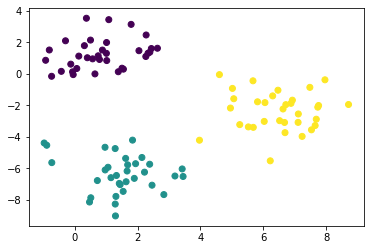

In [4]:
x,y = ds.make_blobs()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans

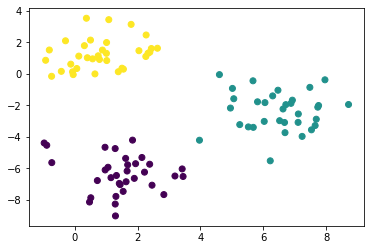

In [5]:
ypred = cl.KMeans(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

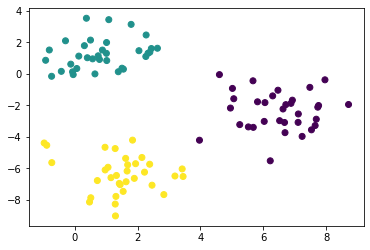

In [6]:
ypred = cl.AgglomerativeClustering(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

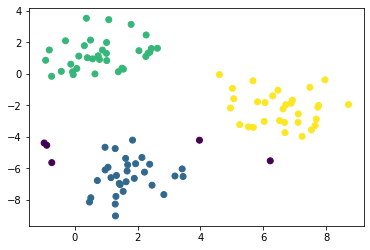

In [7]:
ypred = cl.DBSCAN(eps=1.5).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

#### Moons

Визуализируем объекты с исходными метками:

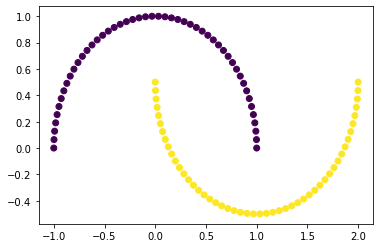

In [8]:
x,y = data = ds.make_moons()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans

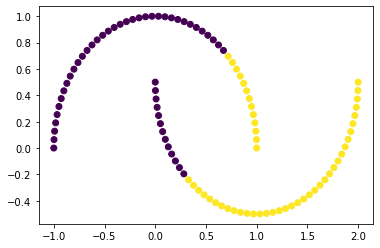

In [9]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

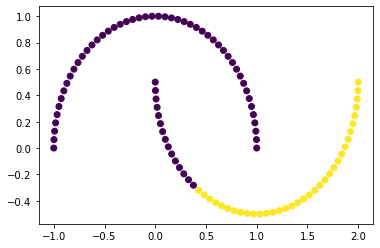

In [10]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

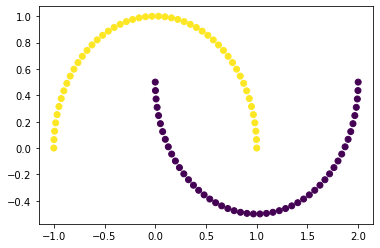

In [11]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

#### Circles

Визуализируем объекты с исходными метками:

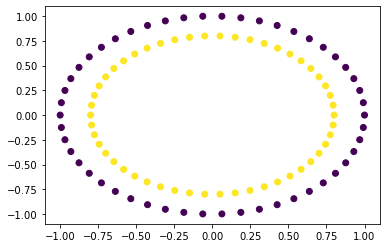

In [12]:
x,y = data = ds.make_circles()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans

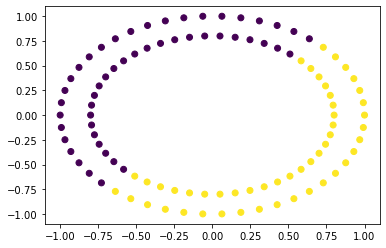

In [13]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

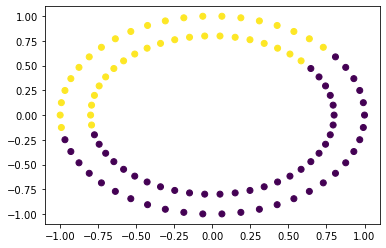

In [14]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

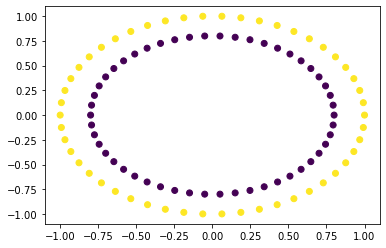

In [15]:
clust = cl.DBSCAN(eps=0.18, min_samples=3)
ypred = clust.fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

## Кластеризация выбранного набора данных

Все параметры в датасете категориальные, поэтому закодируем буквенные обозначения (метки) в цифровой вид и отделим целевой параметр

In [16]:
data = pd.read_csv('bus.csv', sep=' ', index_col=False)

x = data.iloc[:,:18]
y = data.iloc[:,18:]

LE = sk.preprocessing.LabelEncoder()
y = LE.fit_transform(y)

data.head()

,compactness,circularity,distance_circularuty,radius_ratio,praxis_aspect_ratio,maxlen_aspect_ratio,scatter_ratio,elongatedness,praxis_rectangularity,maxlen_rectangularity,scvar_major,scvar_minor,scrad_gyration,skew_major,skew_minor,kurt_minor,kurt_major,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [17]:
px.scatter(x=data.iloc[:,2],y=data.iloc[:,1], color=data['class'])

Рассмотрим различное количество кластеров и оценку силуэтов для каждого

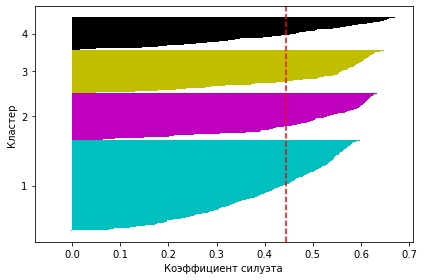

In [18]:
cluster = cl.KMeans(n_clusters=4)
ypred = cluster.fit_predict(x)

cluster_labels = np.unique(ypred)
n_clusters  = cluster_labels.shape[0]
silhouette_values = me.silhouette_samples(x,ypred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for c in cluster_labels:
    c_silhouette_values = silhouette_values[ypred == c]
    c_silhouette_values.sort()
    y_ax_upper += len(c_silhouette_values)
    color = ['c','m','y','k'][c]  
    plt.barh(range(y_ax_lower, y_ax_upper), 
            c_silhouette_values, 
            height = 1.0, 
            edgecolor='none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_values)

silhouette_avg = np.mean(silhouette_values)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')
plt.tight_layout()
plt.show()

Кластеризуем с помощью KMeans

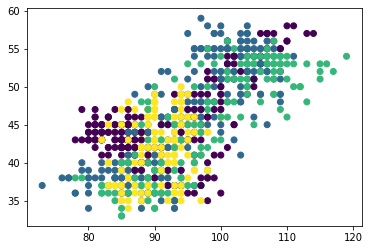

In [19]:
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y)

In [20]:
me.cluster.rand_score(y,ypred)

0.6523339907955292

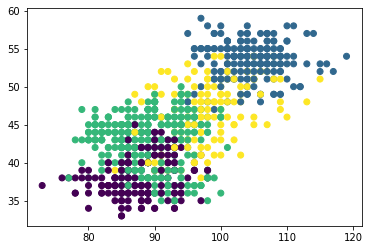

In [21]:
cluster = cl.KMeans(n_clusters=4)
ypred = cluster.fit_predict(x)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=ypred)

In [22]:
tempu, tempc = np.unique(ypred, return_counts=True)
dict(zip(tempu,tempc))

{0: 168, 1: 188, 2: 359, 3: 131}

(array([ 10.,  20.,  31.,  58.,  67.,  73., 111., 142., 208., 126.]),
 array([-0.04219608,  0.02921918,  0.10063444,  0.17204969,  0.24346495,
         0.3148802 ,  0.38629546,  0.45771072,  0.52912597,  0.60054123,
         0.67195649]),
 <BarContainer object of 10 artists>)

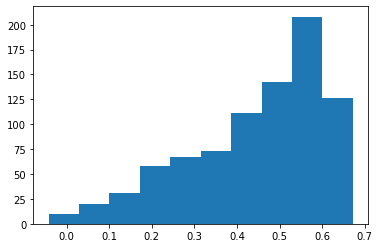

In [23]:
plt.hist(sk.metrics.silhouette_samples(x,ypred))

Кластеризуем с помощью AgglomerativeClustering

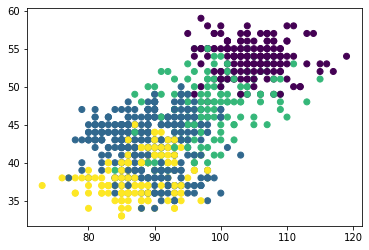

In [24]:
cluster = cl.AgglomerativeClustering(n_clusters=4)
ypred = cluster.fit_predict(x)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=ypred)

{0: 169, 1: 384, 2: 142, 3: 151}


(array([169., 384., 142., 151.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

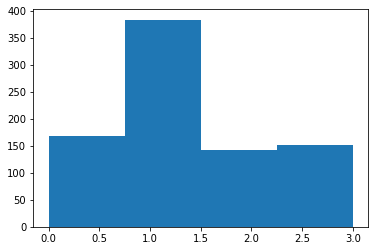

In [25]:
tempu, tempc = np.unique(ypred, return_counts=True)
print(dict(zip(tempu,tempc)))
plt.hist(ypred, bins=len(tempu))

(array([  5.,   5.,   9.,  16.,  32.,  60., 102., 149., 249., 219.]),
 array([-0.3994366 , -0.29289464, -0.18635267, -0.0798107 ,  0.02673126,
         0.13327323,  0.2398152 ,  0.34635716,  0.45289913,  0.5594411 ,
         0.66598306]),
 <BarContainer object of 10 artists>)

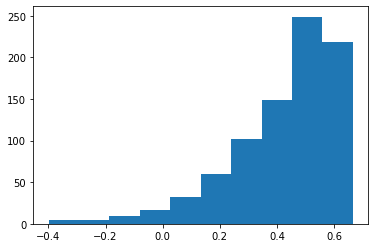

In [26]:
plt.hist(sk.metrics.silhouette_samples(x,ypred))

Кластеризуем с помощью DBSCAN

In [32]:
cluster = cl.DBSCAN(eps=1, min_samples=5)
ypred = cluster.fit_predict(x)
tempu, tempc = np.unique(ypred, return_counts=True)
dict(zip(tempu,tempc))

{-1: 846}

In [28]:
tempu, tempc = np.unique(ypred, return_counts=True)
dict(zip(tempu,tempc))

{-1: 2, 0: 844}

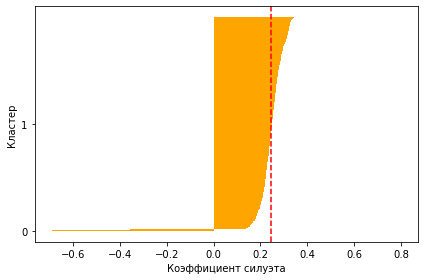

In [29]:
getsil(x,ypred)